# Efficiency Ratios per Block

This code plots the efficiency ratios per block. The values are inputted manually, obtained from the file: "branching_ratio_calculation.ipynb". 

Weighted mean = 4.107023 ± 0.023484  (chi2/ndof = 9.05/3)


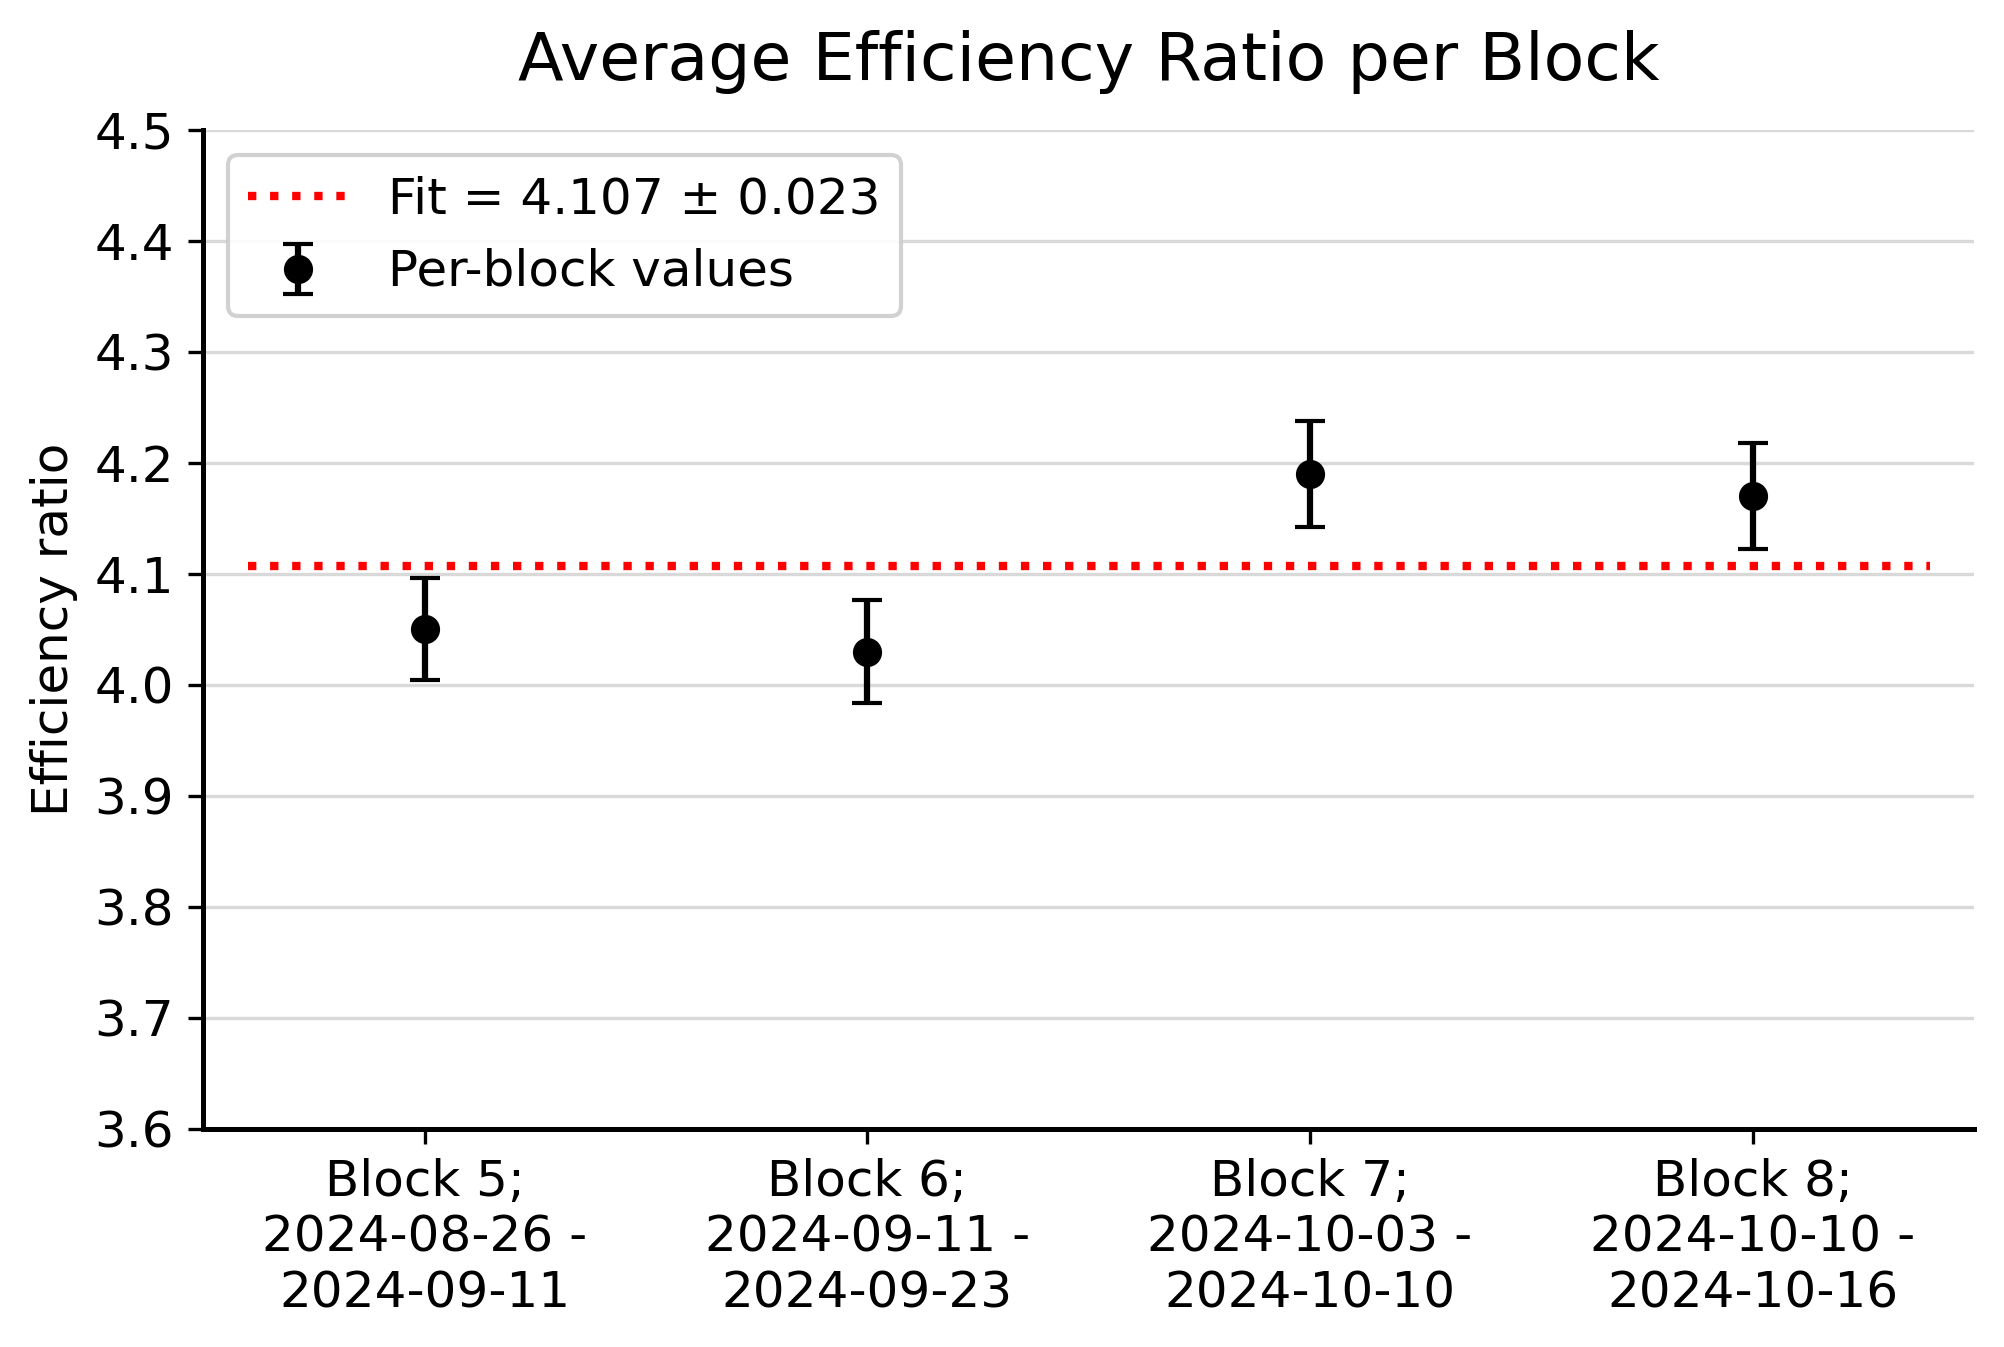

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def fit_constant(y, yerr):
    """Do a weighted average fit to a constant. Returns (mean, mean_err, chi2, ndof)."""
    y = np.asarray(y, dtype=float)
    yerr = np.asarray(yerr, dtype=float)
    w = 1.0 / (yerr**2)
    ybar = np.sum(w * y) / np.sum(w)
    ybar_err = np.sqrt(1.0 / np.sum(w))
    chi2 = np.sum(((y - ybar) / yerr) ** 2)
    ndof = len(y) - 1
    return ybar, ybar_err, chi2, ndof

def plot_block_ratios(
    blocks,
    ratios,
    ratio_errs,
    *,
    title="Average efficiency ratio per block",
    ylabel="Efficiency ratio",
    ylimits=None,
    caption="",
    figwidth=7.2, figheight=5.0,
):
    """Make a block-by-block plot of ratios with error bars and a constant fit."""
    blocks = list(blocks)
    ratios = np.asarray(ratios, dtype=float)
    ratio_errs = np.asarray(ratio_errs, dtype=float)

    # Do the constant fit
    ybar, ybar_err, chi2, ndof = fit_constant(ratios, ratio_errs)
    fit_label = f"Fit = {ybar:.3f} ± {ybar_err:.3f}"

    # Styling tweaks
    plt.rcParams.update({
        "figure.dpi": 300,
        "axes.linewidth": 1.2,
        "axes.grid": True,
        "grid.color": "#C0C0C0",
        "grid.linestyle": "-",
        "grid.alpha": 0.6,
        "font.size": 12,
        "mathtext.default": "regular",
    })

    fig, ax = plt.subplots(figsize=(figwidth, figheight))

    # x positions just 0,1,2,... for blocks
    x = np.arange(len(blocks))

    # Scatter with error bars
    ax.errorbar(
        x, ratios, yerr=ratio_errs,
        fmt="o", color="black", ecolor="black",
        capsize=3.5, markersize=6,
        label="Per-block values"
    )

    # Add the horizontal fit line
    ax.hlines(ybar, x.min()-0.4, x.max()+0.4,
              colors="red", linestyles="dotted", linewidth=2.0,
              label=fit_label)

    # Axis ranges
    ax.set_xlim(-0.5, len(blocks)-0.5)
    if ylimits is not None:
        ax.set_ylim(*ylimits)

    # Titles/labels
    ax.set_title(title, pad=12, fontsize=16)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x, blocks)

    # Grid: keep y-grid, kill x-grid
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)

    # Hide the top/right border
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)

    # Legend
    leg = ax.legend(loc="upper left", frameon=True)
    leg.get_frame().set_alpha(0.9)

    # Caption below plot
    fig.text(0.5, 0.01, caption, ha="center", va="bottom", fontsize=11)

    fig.tight_layout(rect=(0.04, 0.05, 0.99, 0.98))
    return fig, ax, (ybar, ybar_err, chi2, ndof)


# Example usage
if __name__ == "__main__":
    blocks = [
        "Block 5;\n2024-08-26 -\n2024-09-11",
        "Block 6;\n2024-09-11 -\n2024-09-23",
        "Block 7;\n2024-10-03 -\n2024-10-10",
        "Block 8;\n2024-10-10 -\n2024-10-16",
    ]
    ratios = [4.05, 4.03, 4.19, 4.17]
    ratio_errs = [0.046, 0.046, 0.048, 0.048]

    fig, ax, fit = plot_block_ratios(
        blocks, ratios, ratio_errs,
        title="Average Efficiency Ratio per Block",
        ylimits=(3.6, 4.5),
        caption="",
    )
    print(f"Weighted mean = {fit[0]:.6f} ± {fit[1]:.6f}  (chi2/ndof = {fit[2]:.2f}/{fit[3]})")
    plt.show()
